### ANN Implementation

In [54]:
#!pip install tensorflow-gpu

In [55]:
#Importing some basic libraries
import pandas as pd
import numpy as np
import tensorflow as tf

In [56]:
print(tf.__version__)

2.10.0


In [57]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
## Dividing the data into dependent and independent features
X = df.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [59]:
y = df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [60]:
## Feature Engineering
pd.get_dummies(X['Geography'],drop_first=True)

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [61]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [62]:
## Concat them with dataframe
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [63]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [64]:
X = pd.concat([X,geography,gender],axis=1)

In [65]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [66]:
X.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Germany            0
Spain              0
Male               0
dtype: int64

In [67]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [69]:
print(X_train.shape)
print(X_test.shape)

(8000, 11)
(2000, 11)


In ANN feature scaling is very important.

In [70]:
 from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [73]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [74]:
X_train.shape

(8000, 11)

In [75]:
X_test.shape

(2000, 11)

In [76]:
## Creating the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [77]:
 ## Initilize the ANN
 classifier = Sequential()

In [78]:
## Adding the input layers
classifier.add(Dense (units=11,activation='relu'))

In [79]:
## Adding 1st hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [80]:
## Adding the 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.5))

In [81]:
## Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [82]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [83]:
## Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [84]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.5932 - accuracy: 0.7347 - val_loss: 0.5013 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.5089 - accuracy: 0.7972 - val_loss: 0.4601 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4814 - accuracy: 0.7985 - val_loss: 0.4500 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4698 - accuracy: 0.8041 - val_loss: 0.4387 - val_accuracy: 0.7986
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4600 - accuracy: 0.8056 - val_loss: 0.4321 - val_accuracy: 0.8023
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4509 - accuracy: 0.8061 - val_loss: 0.4249 - val_accuracy: 0.8058
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4415 - accuracy: 0.8153 - val_loss: 0.4157 - val_accuracy:

In [85]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

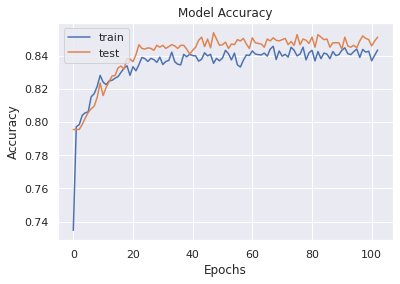

In [87]:
## Summarizing history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

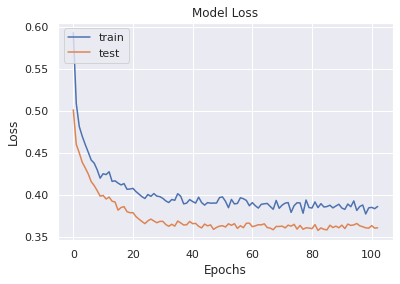

In [88]:
## Summarizing history for Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [89]:
## Prediction for test
y_predict = classifier.predict(X_test)
y_predict = (y_predict >=0.5)

63/63 [==============================] - 0s 2ms/step


In [90]:
y_predict

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [91]:
cm = tf.math.confusion_matrix(y_predict,y_test)

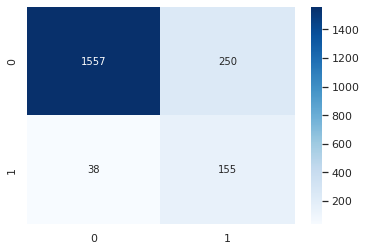

In [92]:
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')

In [93]:
## Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_predict,y_test)

In [94]:
score

0.856

In [95]:
classifier.get_weights()

[array([[ 0.4097006 ,  0.04525878, -0.07481471,  0.03626913,  0.0481538 ,
         -0.42604613,  0.14181255,  0.12900002,  0.1863553 ,  0.02083777,
          0.05141815],
        [ 0.17185415,  0.28115213,  0.6494068 ,  0.23924944, -0.00461275,
          0.32326365, -0.78127533, -0.02900555, -0.692266  , -0.68310726,
         -0.14367765],
        [ 0.00989146, -0.21472415, -0.10569406, -0.01574148, -0.01336434,
         -0.18660277,  0.05416557, -0.02677085, -0.3757441 , -0.13768952,
         -0.3426356 ],
        [ 0.3816135 ,  0.03505406, -0.4981133 , -0.16918279, -1.037194  ,
          0.0826581 , -0.46082073, -0.5400703 , -0.45199388, -0.09292745,
          0.51544493],
        [-0.2877527 , -0.9884228 ,  0.10768146,  1.2197554 , -1.3331912 ,
          0.34915635,  0.0759502 ,  0.17567244,  0.21427715,  0.09044955,
          1.0205674 ],
        [-0.22753833, -0.05183506,  0.07261995,  0.00891168, -0.04652905,
         -0.02726161, -0.3190751 ,  0.07526758,  0.24629208, -0.1010754